In [10]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# class to handle points concisely
class Point():
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    # for testing
    def __str__(self):
        return '(' + str(self.x) + ', ' + str(self.y) + ')'
    
# standalone distance method
def distance(p1, p2):
    return math.sqrt((p1.x-p2.x)**2 + (p1.y-p2.y)**2) ## O(1) complexity.

# This is only used to help make the plot for visualization
def break_coords(pts):
    x = []
    y = []
    for i in pts:
        x.append(i.x)
        y.append(i.y)
    return x,y

# generate random points from uniform distribution
def generate(n):
    points = []
    for i in range(n):
        x = round(random.uniform(0, 2*n),2)
        y = round(random.uniform(0, 2*n),2)
        points.append(Point(x,y))
    return points

pt1 = Point(3, 4)
print(pt1.y)
pt2=Point(2,2)
print(distance(pt1, pt2))
array=generate(5)

4
2.23606797749979
[<__main__.Point object at 0x0000023D34BE5580>, <__main__.Point object at 0x0000023D34BEE3D0>, <__main__.Point object at 0x0000023D34BEE340>, <__main__.Point object at 0x0000023D34BEE490>, <__main__.Point object at 0x0000023D34BEE220>]


In [22]:
# exhaustive (brute force) search
def exhaustive(pts):
    n = len(pts)
    min_dist = float('inf')
    close_pair = None
    for i in range(n):
        for j in range(i+1, n):
            current_dist = distance(pts[i],pts[j]) ## Running O(1) complexity function n*(n-1) times == O(n^2)
            if(current_dist < min_dist):
                min_dist = current_dist
                close_pair = (pts[i], pts[j])
    return [close_pair[0], close_pair[1], min_dist]

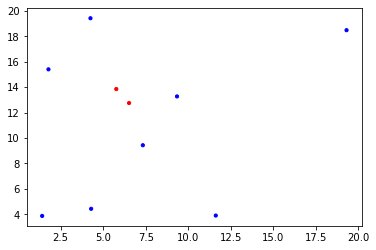

In [31]:
random.seed(101)
points = generate(10)
# conduct basic search
results = exhaustive(points)
# extract output
close_pair = results[0:2]
dist = results[2]
# use these color values for a plot to check visually
colors = [(1,0,0) if x in close_pair else (0,0,1) for x in points]
# plot results
pts_x, pts_y = break_coords(points)
plt.scatter(pts_x, pts_y, s=10, c=colors)

In [33]:
# inputs are lists of the same points
# one sorted by x, one sorted by y
def closestHelper(pts_x, pts_y):
    
    # if 3 or fewer points, conduct brute force search
    # normally this is O(n^2) but we limit n here
    n = len(pts_x)
    if n <= 3:
        return exhaustive(pts_x)
    
    # establish a middle index and midpoint for x-values
    mid = n // 2
    mid_point = pts_x[mid]
    
    # split the y points based on which side of the middle x they fall
    # this guarantees that the y lists will match later x lists
    # also preserves ordering of points by y
    pts_left_y = []
    pts_right_y = []
    for i in pts_y:
        if i.x < mid_point.x:
            pts_left_y.append(i)
        else:
            pts_right_y.append(i)
    
    # recursive call to left and right sides based on middle x-value
    result_l = closestHelper(pts_x[:mid], pts_left_y)
    result_r = closestHelper(pts_x[mid:], pts_right_y)

    # store only the minimum out of left and right results
    # split into if/else to allow storing the closest pair of points as well as distance
    if result_l[2] < result_r[2]: # Comparing distances of point pairs.
        p1 = result_l[0]
        p2 = result_l[1]
        min_dist = result_l[2]
    else:
        p1 = result_r[0]
        p2 = result_r[1]
        min_dist = result_r[2]
    
    # create the central strip that contains the points we want to check across the midline
    # keep points within current min distance of middle x-value
    # still preserving ordering by y
    strip_y = []
    for i in pts_y:
        if abs(i.x - mid_point.x) < min_dist:
            strip_y.append(i)
    
    # go through strip and make comparisons for points across line
    # looks like it could be O(n^2) but sparsity principle guarantees at most
    # 6 comparisons for each point considered
    # note that while loop stops when difference in y exceeds current known minimum
    for i in range(len(strip_y)-1):
        j = i+1
        while j < len(strip_y) and strip_y[i].y-strip_y[j].y < min_dist:
            if distance(strip_y[i], strip_y[j]) < min_dist:
                min_dist = distance(strip_y[i], strip_y[j])
                p1 = strip_y[i]
                p2 = strip_y[j]
            j += 1
    
    # return the two closest points and their distance
    return [p1, p2, min_dist]


In [34]:
# main function to call for doing the search
# this function only sorts the points by x and y
# then calls to recursive helper
def closestPair(pts):
    
    sorted_x = sorted(pts, key = lambda p: p.x)
    sorted_y = sorted(pts, key = lambda p: p.y)
    
    return closestHelper(sorted_x, sorted_y)

In [311]:
# empirical testing to show it is working by comparing to 
# brute force search many times
# if it prints nothing then everything was right
for i in range(100):
    for j in range(1,50):
        data = generate(11)
        min1 = round(exhaustive(data)[2], 3)
        min2 = round(closestPair(data)[2], 3)
        if (min1 != min2):
            print(str(min1) + ' : ' + str(min2))
            break

(37.86, 1.74)
(2.27, 0.1)
(5.02, 39.45)
(33.41, 36.67)
(7.45, 27.51)
(31.81, 29.08)
(10.79, 38.83)
(29.13, 27.37)
(11.38, 15.89)
(30.31, 20.65)
(19.52, 36.79)
(16.82, 34.36)
(1.87, 21.22)
(28.52, 0.43)
(27.85, 11.44)
(25.03, 24.93)
(5.46, 37.75)
(9.7, 5.46)
(17.71, 2.56)
(4.05, 30.46)
X sorted
(1.87, 21.22)
(2.27, 0.1)
(4.05, 30.46)
(5.02, 39.45)
(5.46, 37.75)
(7.45, 27.51)
(9.7, 5.46)
(10.79, 38.83)
(11.38, 15.89)
(16.82, 34.36)
(17.71, 2.56)
(19.52, 36.79)
(25.03, 24.93)
(27.85, 11.44)
(28.52, 0.43)
(29.13, 27.37)
(30.31, 20.65)
(31.81, 29.08)
(33.41, 36.67)
(37.86, 1.74)
Y sorted
(2.27, 0.1)
(28.52, 0.43)
(37.86, 1.74)
(17.71, 2.56)
(9.7, 5.46)
(27.85, 11.44)
(11.38, 15.89)
(30.31, 20.65)
(1.87, 21.22)
(25.03, 24.93)
(29.13, 27.37)
(7.45, 27.51)
(31.81, 29.08)
(4.05, 30.46)
(16.82, 34.36)
(33.41, 36.67)
(19.52, 36.79)
(5.46, 37.75)
(10.79, 38.83)
(5.02, 39.45)


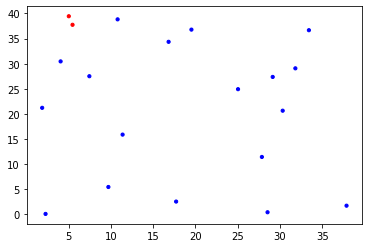

In [43]:
# just another plotting tool for final algorithm
data = generate(20)

sorted_x = sorted(data, key = lambda p: p.x)
sorted_y = sorted(data, key = lambda p: p.y)
for i in range(len(data)):
    print(data[i])
print("X sorted")
for i in range(len(data)):
    print(sorted_x[i])
print("Y sorted")
for i in range(len(data)):
    print(sorted_y[i])
    


results = closestPair(data)
close_pair = results[0:2]

dist = results[2]
colors = [(1,0,0) if x in close_pair else (0,0,1) for x in data]
pts_x, pts_y = break_coords(data)
plt.scatter(pts_x, pts_y, s=10, c=colors)